# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Init

In [11]:
import datahandler

import matplotlib.pyplot as plt

data_preprocessor = datahandler.DataPreprocessorOUS_V2()
data_preprocessor.execute()

data_loader = datahandler.DataLoader(datahandler.DataPreprocessorOUS_V2)
data_loader.execute(clean=True, processed=True, enhanced=True)

Loading dataset: 100%|██████████| 6/6 [00:13<00:00,  2.28s/it]


# Imports

In [12]:
import seaborn as sns

# Plot Triage Distributions

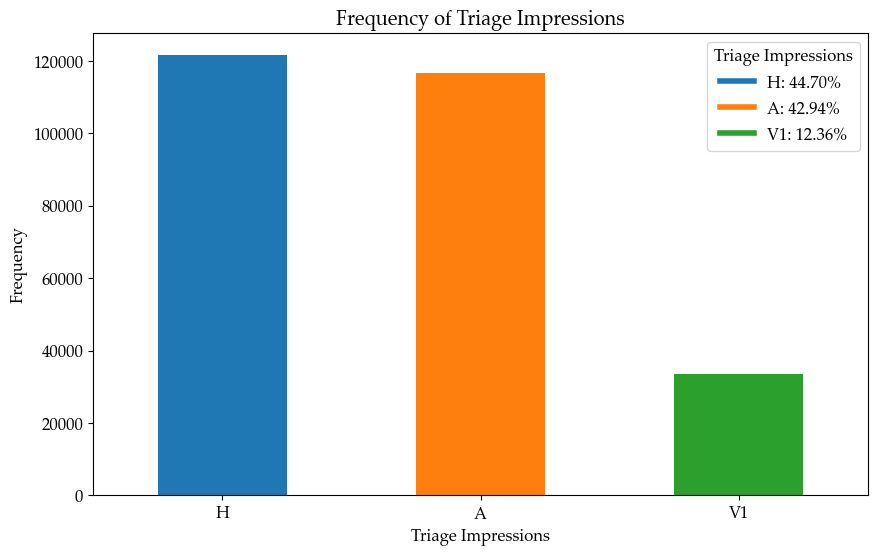

In [49]:
df = data_loader.enhanced_incidents_df

triage_counts = df["triage_impression_during_call"].value_counts()
colors = sns.color_palette()[:len(triage_counts.index)]

total = len(df)
percentages = (triage_counts / total) * 100

triage_counts.plot(kind="bar", figsize=(10,6), color=colors)
plt.title("Frequency of Triage Impressions")
plt.ylabel("Frequency")
plt.xlabel("Triage Impressions")
plt.xticks(rotation=0)
# add legend
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
labels = [f"{cat}: {pct:.2f}%" for cat, pct in zip(triage_counts.index, percentages)]
plt.legend(handles, labels, title="Triage Impressions")

plt.show()

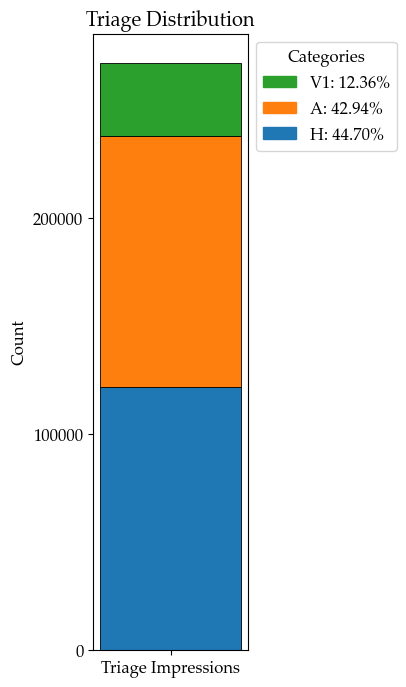

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = sns.color_palette()

bottom = 0
total_count = sum([triage_counts.get(cat, 0) for cat in triage_counts.index])
legend_labels = []
legend_colors = []

plt.figure(figsize=(2, 8))

for idx, cat in enumerate(triage_counts.index):
    count = triage_counts.get(cat, 0)
    percentage = (count / total_count) * 100
    label = f"{cat}: {percentage:.2f}%"
    
    plt.bar('Triage Impressions', count, bottom=bottom, color=colors[idx], edgecolor='black', linewidth=0.6)
    bottom += count
    
    legend_labels.append(label)
    legend_colors.append(colors[idx])

plt.yticks(range(0, bottom+1, 100000))
plt.ylabel('Count')
plt.title('Triage Distribution')

plt.legend(handles=[plt.Rectangle((0,0),1,1, color=color) for color in reversed(legend_colors)], 
           labels=reversed(legend_labels), title='Categories', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()
